<a href="https://colab.research.google.com/github/manusmriti31/Learning_PyTorch/blob/main/Exercise/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Mon Dec 16 13:47:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

2.5.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

The 3 areas in the industry where computer vision is currently being used:
1. Object detection
2. Face recognition
3. Self driving cars

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is a phenomena in machnine learning where our training models learns the patterns on the training data a little too well, where it not only recognizes the patters, but also ends up learning the noise of the data.
Thus this type of model performs well on the training data but does not perform well on the unseen data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Ways to prevent overfitting:
1. Regularization:
  - This is a method where to shiring the model's parameters inorder to make them insensitive towards noise. The methods of regularization are L1 and L2
2. Cross Validation
  - Here we divide the dataset into multiple folds and then train our model across one and then get it validated across the rest everytime
3. Feature selection
  - This methods reduces the number of features and making sure only the necessary ones pass through

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

I uploaded an image of a pizza and it was not able to predict it

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Importing train and test data from FashionMNSIT
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    transform = ToTensor(),
    target_transform = None,
    download = True
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    transform = ToTensor(),
    target_transform = None,
    download = True
)

len(train_data), len(test_data)


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.4MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 306kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.27MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

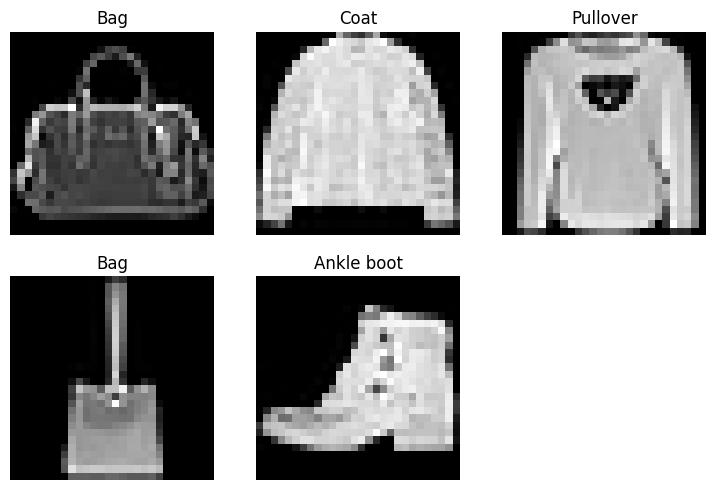

In [5]:
# train_data[0][0]
import matplotlib.pyplot as plt
rand_index = torch.randint(0,1000,(5,))
class_names = train_data.classes
fig =  plt.figure(figsize=(9,9))
a = 1
for i in rand_index:
  image, label = train_data[i]
  fig.add_subplot(3,3,a)
  a += 1
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.title(class_names[label]);
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

print(f"The dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} in batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} in batches of {BATCH_SIZE}")

The dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78d2648aefe0>, <torch.utils.data.dataloader.DataLoader object at 0x78d2648aeec0>)
Length of train dataloader: 1875 in batches of 32
Length of test dataloader: 313 in batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# Creating a convolutional neural network
from torch import nn
class FashionMNSITModelV0(nn.Module):
  def __init__(self,input_layer: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_layer,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1,
                  stride = 1),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1,
                  stride = 1),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self,x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

model_0 = FashionMNSITModelV0(input_layer = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to("cpu")

model_1 = FashionMNSITModelV0(input_layer = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
# The timer fuction
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = device):
  "Prints the difference between the start and the end time"
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [9]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py alredy exits, skipping download.....")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)

In [10]:
loss_fn_0 = nn.CrossEntropyLoss()
loss_fn_1 = nn.CrossEntropyLoss()

optimizer_0 = torch.optim.SGD(params = model_0.parameters(),
                              lr = 0.1)
optimizer_1 = torch.optim.SGD(params = model_1.parameters(),
                              lr = 0.1)

In [11]:
from tqdm.auto import tqdm

torch.manual_seed(42)

def train_test_loop(model: nn.Module,
                    dataloader_train: torch.utils.data.DataLoader,
                    dataloader_test: torch.utils.data.DataLoader,
                    optimizer: torch.optim.Optimizer,
                    loss_fn: torch.nn.Module,
                    accuracy_fn,
                    device: torch.device = device):
  epochs = 5

  train_time_start = timer()

  for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    ### Training
    train_loss = 0
    train_acc = 0
    for batch, (X,y) in enumerate(dataloader_train):
      model.train()
      # Put data on target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_preds = model(X)

      # 2. Calculate the loss (per batch)
      loss = loss_fn(y_preds, y)
      train_loss += loss
      train_acc += accuracy_fn(y_true = y, y_pred = y_preds.argmax(dim=1))

      # 3. Optimizer step(update the model's parameters once *per batch*)
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Print out
      if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(dataloader_train.dataset)} samples.")

    train_loss /= len(dataloader_train)
    train_acc /= len(dataloader_train)


    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
      for X_test, y_test in dataloader_test:
        X_test, y_test = X_test.to(device), y_test.to(device)
        # 1. Forward pass
        test_preds = model(X_test)

        # 2. Calculate the loss
        test_loss += loss_fn(test_preds, y_test)

        # 3. Calculate the accuracy
        test_acc += accuracy_fn(y_true = y_test, y_pred = test_preds.argmax(dim=1))

      # Calculate the test loss average per batch
      test_loss /= len(dataloader_test)

      # Calculate the train loss average per batch
      test_acc /= len(dataloader_test)

    # Print what's happenin
    print(f"\nTrain loss: {train_loss:.5f}, Train accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}%")

  train_time_end = timer()

  total_train_time = print_train_time(train_time_start,train_time_end,device)
  print(f"The total time on device: {device} is {total_train_time} seconds")


In [12]:
from helper_functions import accuracy_fn

train_test_loop(model = model_0,
                dataloader_train = train_dataloader,
                dataloader_test = test_dataloader,
                optimizer = optimizer_0,
                loss_fn = loss_fn_0,
                accuracy_fn = accuracy_fn,
                device = "cpu")

train_test_loop(model = model_1,
                dataloader_train = train_dataloader,
                dataloader_test = test_dataloader,
                optimizer = optimizer_1,
                loss_fn = loss_fn_1,
                accuracy_fn = accuracy_fn,
                device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.50515, Train accuracy: 81.61% | Test loss: 0.35144, Test accuracy: 87.44%
Epoch: 1
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.32259, Train accuracy: 88.41% | Test loss: 0.31291, Test accuracy: 88.91%
Epoch: 2
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.28657, Train accuracy: 89.80% | Test loss: 0.30177, Test accuracy: 89.17%
Epoch: 3
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.26775, Train accuracy: 90.44% | Test l

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.52473, Train accuracy: 80.97% | Test loss: 0.35687, Test accuracy: 87.78%
Epoch: 1
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.32664, Train accuracy: 88.39% | Test loss: 0.32543, Test accuracy: 88.01%
Epoch: 2
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.29255, Train accuracy: 89.45% | Test loss: 0.29851, Test accuracy: 89.14%
Epoch: 3
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.27085, Train accuracy: 90.24% | Test l

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [13]:
# Make predictions
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  predictions = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # add the batch dimension
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob)
      predictions = torch.stack(pred_probs).argmax(dim=1)

  return predictions

torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

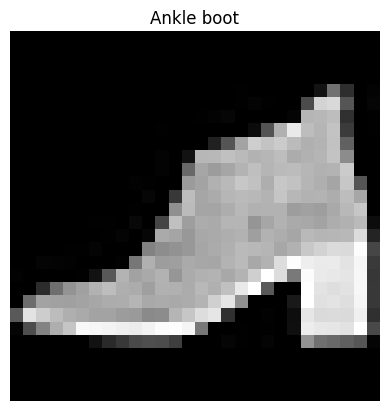

In [14]:
import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

print(test_samples[0].shape)
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [15]:
predictions = make_predictions(model_1,test_samples,device)
predictions

tensor([9, 9, 9, 2, 1, 8, 4, 2, 2], device='cuda:0')

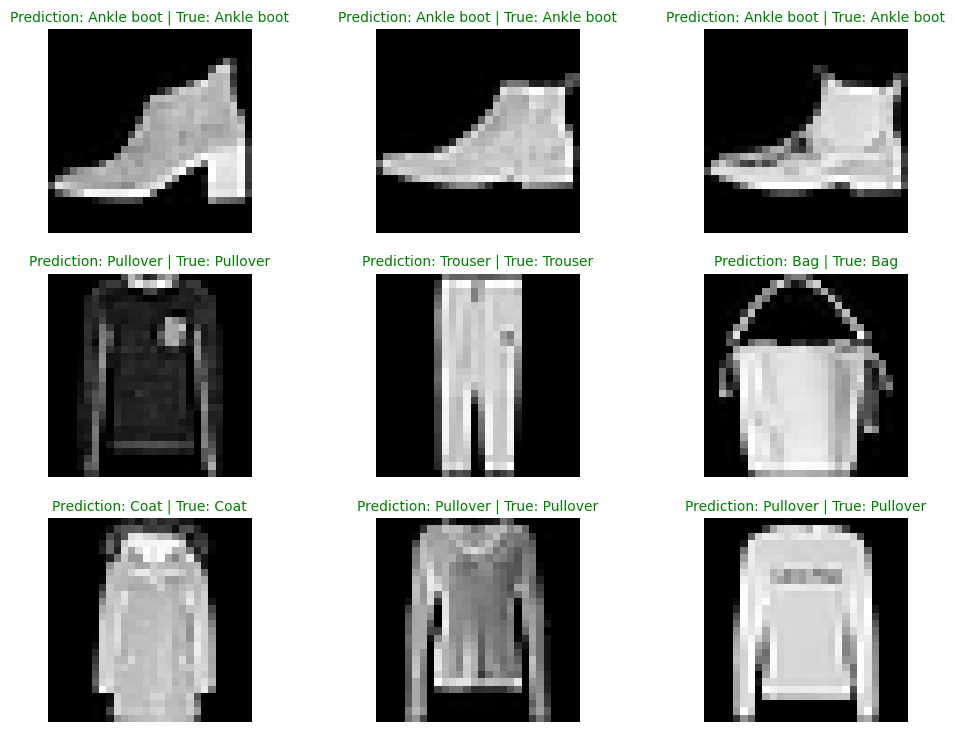

In [16]:
# Plot predictions (visualizing the results)
plt.figure(figsize=(12,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap = 'gray')
  pred_label = class_names[predictions[i]]
  true_label = class_names[test_labels[i]]
  title_test = f"Prediction: {pred_label} | True: {true_label}"
  if true_label == pred_label:
    plt.title(title_test, fontsize = 10, c = 'g')
  else:
    plt.title(title_test, fontsize = 10, c = 'r')
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [19]:
y_preds = []
model_1.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making predictions...."):
    X, y = X.to(device), y.to(device)
    y_logit = model_1(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [21]:
y_preds[0]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8])

In [22]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtedn version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 12.6 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [23]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

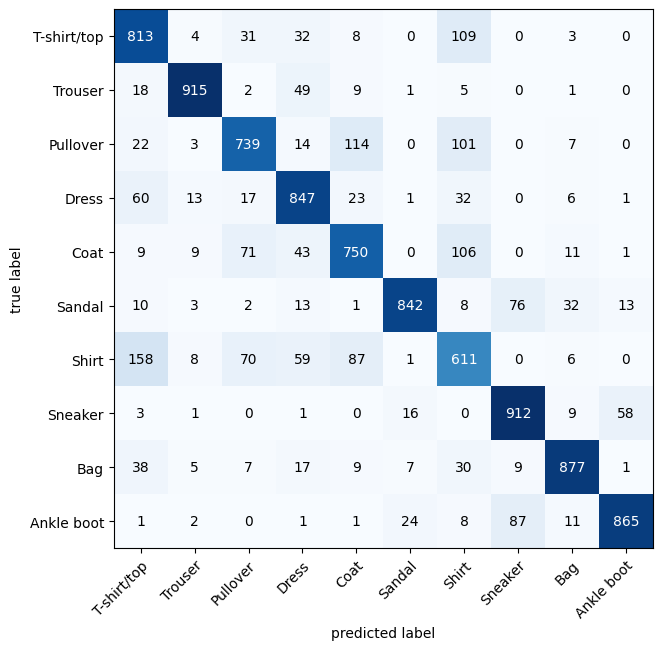

In [26]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)

)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?